## TP7 (implementation des K-Means En Pyhon from scratch
##    GROUPE 3 CONSTITUE DE :
##        - LEPAFO MOFFO Baurel               21S2782
##        - MANFOUO SELATSA Ridano            16U2848
##        - TEINGA KAMGUEN Emmanuel Rufin     21S2822
##        - MEBODO ONOMO JUSTIN JORDAN        19M2217


In [8]:
## ici nous voulons generer les clusters de facon a les visualiser graphiquement
## importation des modules necessaires a l'implementation de K-Means

import numpy as np
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
# definition de notre fonction kmeans

def kmeans(x,k,no_of_iterations):
    idx = np.random.choice(len(x),k,replace =False)
    
    # on choisi ici aleatoirement les centres
    centroids = x[idx,:] # etape 1
    
    ## recherche de la distance entre centroides et tous les differents points
    distances = cdist(x,centroids,'euclidean') ## etape 2
    
    # recuperation du centroide avec la plus petite distance
    
    points = np.array([np.argmin(i) for i in distances]) # etape 2
    
    ## repetition de toutes les taches au dessus pour un nombre defini d'iteration
    
    # etape 4
    
    for _ in range(no_of_iterations):
        
        centroids = []
        for idx in range(k):
            #mettons a jour nos centroides en prenant la moyenne du cluster auquel il appartient
            temp_cent = x[points == idx].mean(axis = 0)
            centroids.append(temp_cent)
            
        centroids = np.stack(centroids) # mise a jour des centroides
        
        distances = cdist(x,centroids,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    
    return points

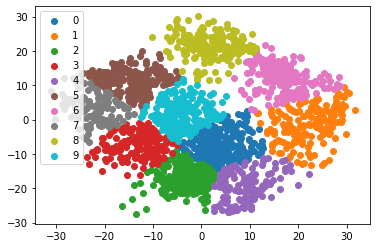

In [12]:
## chargement de nos donnees 

data = load_digits().data
pca = PCA(2)


#transformation des donnees
df = pca.fit_transform(data)

#execution de notre fonction
label = kmeans(df,10,1000)

#visualistaion des resultats

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i,0],df[label == i,1],label=i)

plt.legend()
plt.show()

In [ ]:
# Nous voyons par ce schema que nous avons 10 cluster